In [269]:
import numpy as np
from scipy import fftpack
import matplotlib.pyplot as plt
import matplotlib.image as image
import matplotlib.patches as mpatches
from matplotlib.colors import LogNorm
%matplotlib notebook

In [270]:
path = ''
file_name = 'antes0900.tiff'
my_name = 'CG2020_T2_GabrielBoscoli'

In [271]:
img = image.imread(path + file_name)

In [272]:
h, w = img.shape[:2]

In [273]:
print("dimensões: (" + str(w) + 'x' + str(h) + ')')
print("dtype =", img.dtype)
print("min = " + str(np.amin(img)) + ", max = " + str(np.amax(img)))

dimensões: (920x925)
dtype = uint16
min = 2259, max = 10184


In [274]:
def histograma(img):
    fig_w = 6
    fig_h = 4
    plt.figure(figsize=(fig_w, fig_h))
    _ = plt.hist(img.ravel(), bins=300)
    plt.show()

<IPython.core.display.Javascript object>


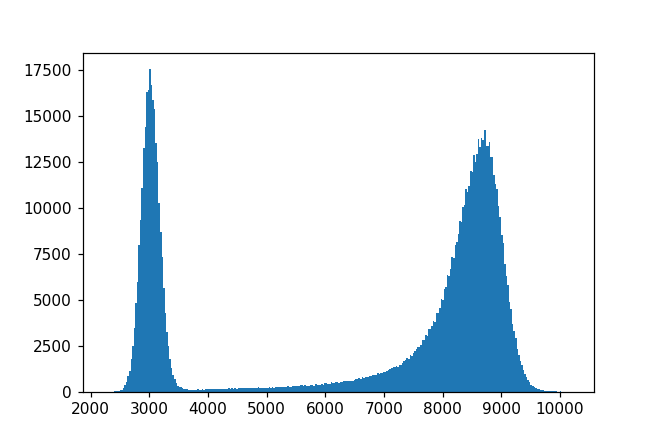

In [275]:
histograma(img)

In [276]:
def show_image(img):
    plt.figure(figsize=(8,8))
    plt.imshow(img, cmap='gray')
    plt.show()

<IPython.core.display.Javascript object>


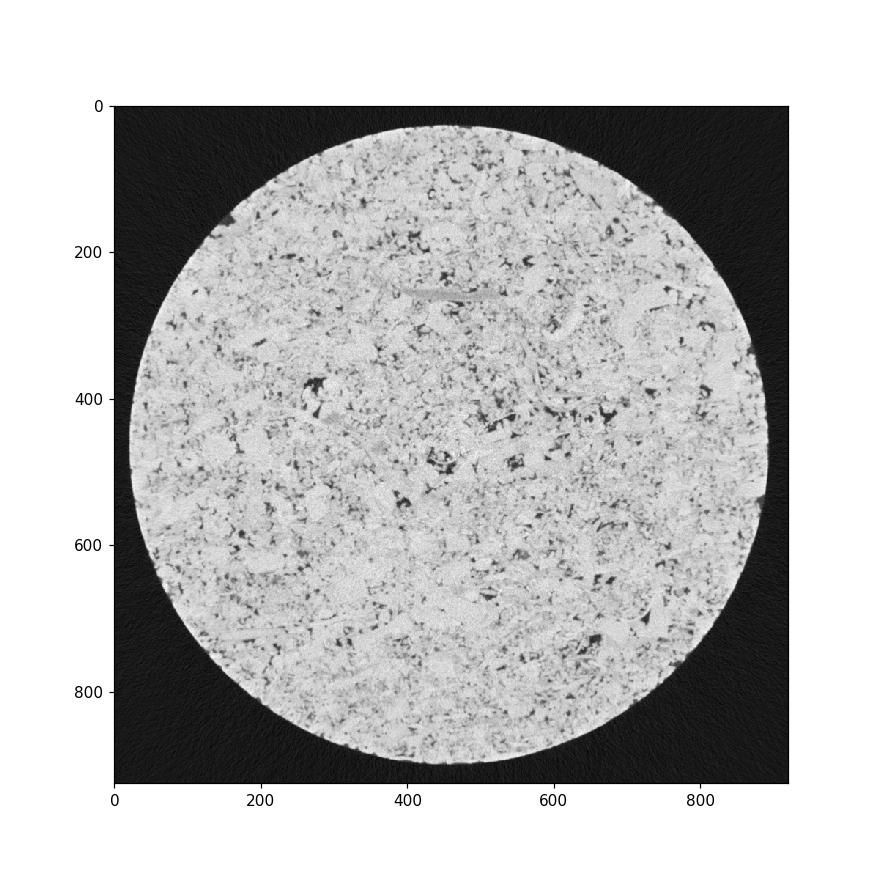

In [277]:
show_image(img)

In [278]:
im_fft = fftpack.fft2(img)

In [279]:
def show_spectrum(im_fft):
    plt.figure(figsize=(8,4))
    plt.imshow(np.abs(im_fft), norm=LogNorm(vmin=1))
    plt.colorbar()

<IPython.core.display.Javascript object>


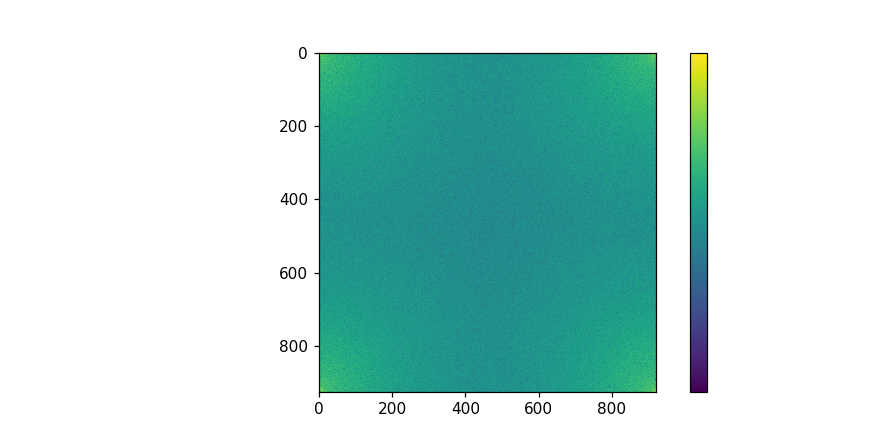

In [280]:
show_spectrum(im_fft)

In [281]:
im_fft_shift = fftpack.fftshift(im_fft)

<IPython.core.display.Javascript object>


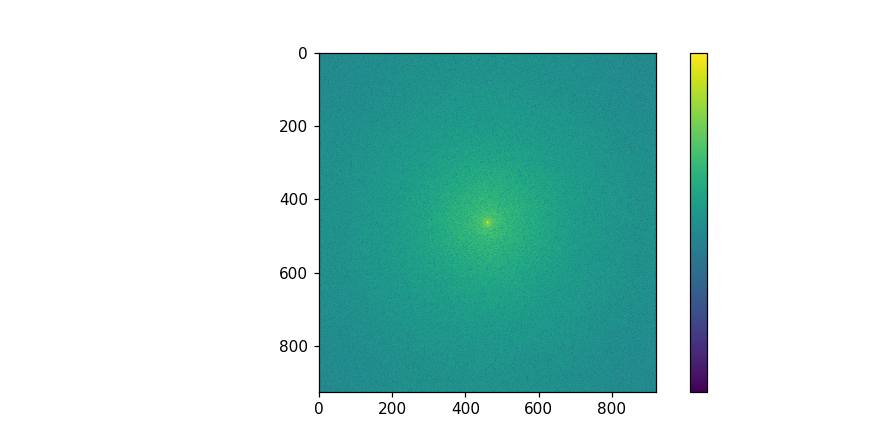

In [282]:
show_spectrum(im_fft_shift)

<IPython.core.display.Javascript object>


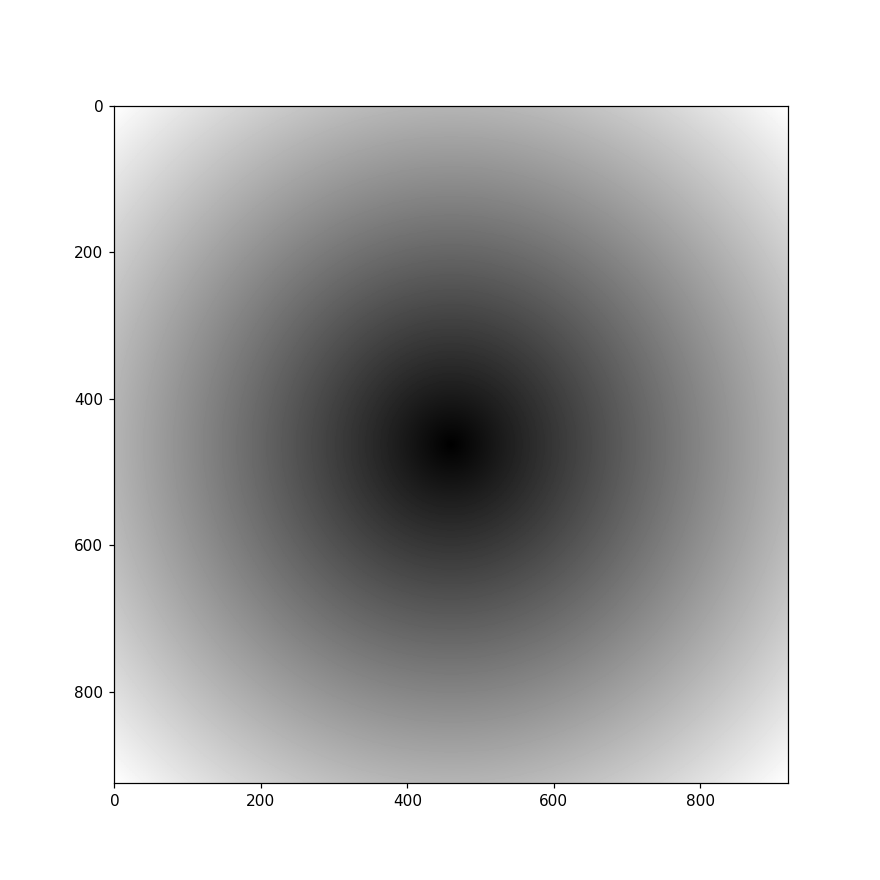

In [283]:
Y,X = np.ogrid[0:h, 0:w]
mask = np.sqrt((X-w/2)**2 + (Y-h/2)**2)
show_image(mask)

<IPython.core.display.Javascript object>


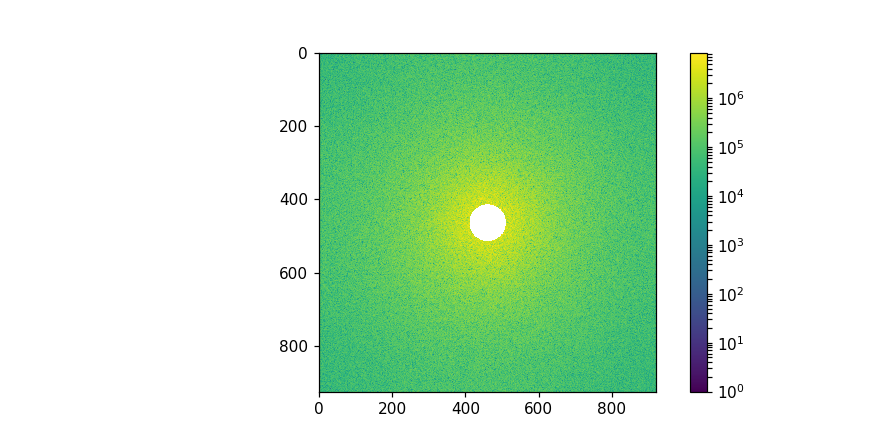

In [284]:
im_fft_shift[mask<50]=0
show_spectrum(im_fft_shift)

<IPython.core.display.Javascript object>


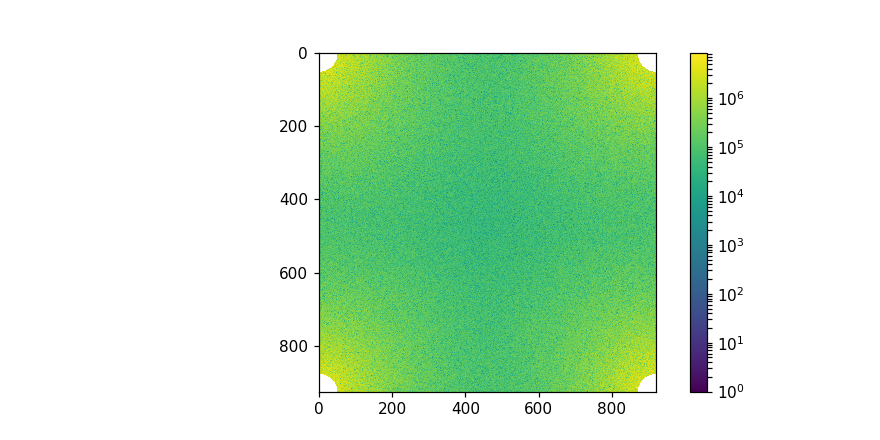

In [285]:
im_fft_2 = fftpack.ifftshift(im_fft_shift)
show_spectrum(im_fft_2)

In [286]:
im_2 = fftpack.ifft2(im_fft_2).real

<IPython.core.display.Javascript object>


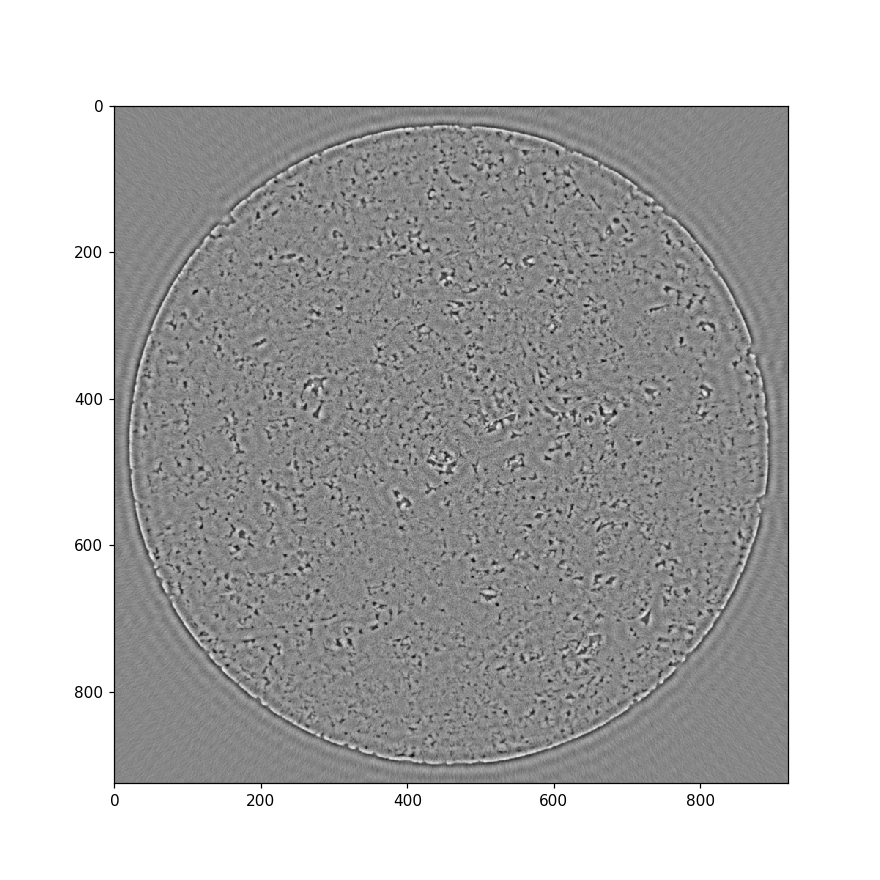

In [287]:
show_image(im_2)

In [288]:
vazio_cor = [255, 0, 0]
alta_cor = [0, 255, 0]
media_cor = [0, 0, 255]
baixa_cor = [255, 255, 255]

In [289]:
def pinta_imagem(rgb, img):
    return np.dstack((img * rgb[0], img * rgb[1], img * rgb[2])).astype(np.uint8)

In [290]:
def get_values(img, vmin, vmax):
    values = np.zeros(img.shape)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i,j] < vmax and img[i,j] > vmin:
                values[i,j] = 1
    return values

In [291]:
vazio = get_values(img, 4000, 7000)
alta = get_values(img, 7000, 8000)
media = get_values(img, 8000, 9000)
baixa = get_values(img, 9000, 10000)

<IPython.core.display.Javascript object>


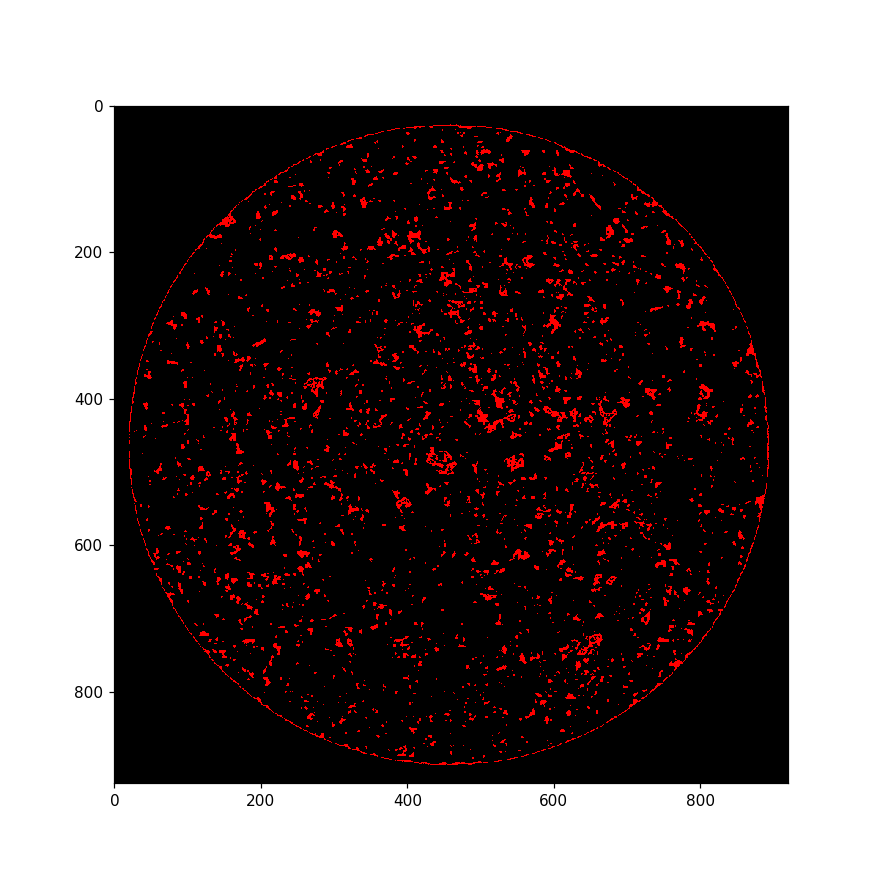

In [292]:
vazio_img = pinta_imagem(vazio_cor, vazio)
show_image(vazio_img)

<IPython.core.display.Javascript object>


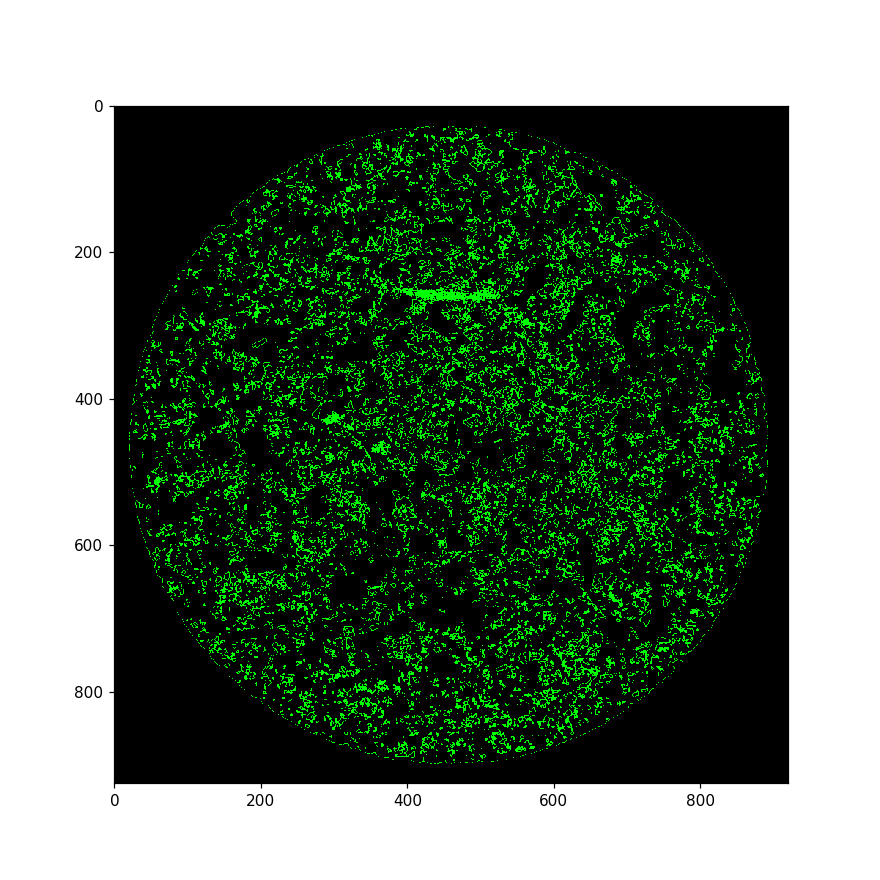

In [293]:
alta_img = pinta_imagem(alta_cor, alta)
show_image(alta_img)

<IPython.core.display.Javascript object>


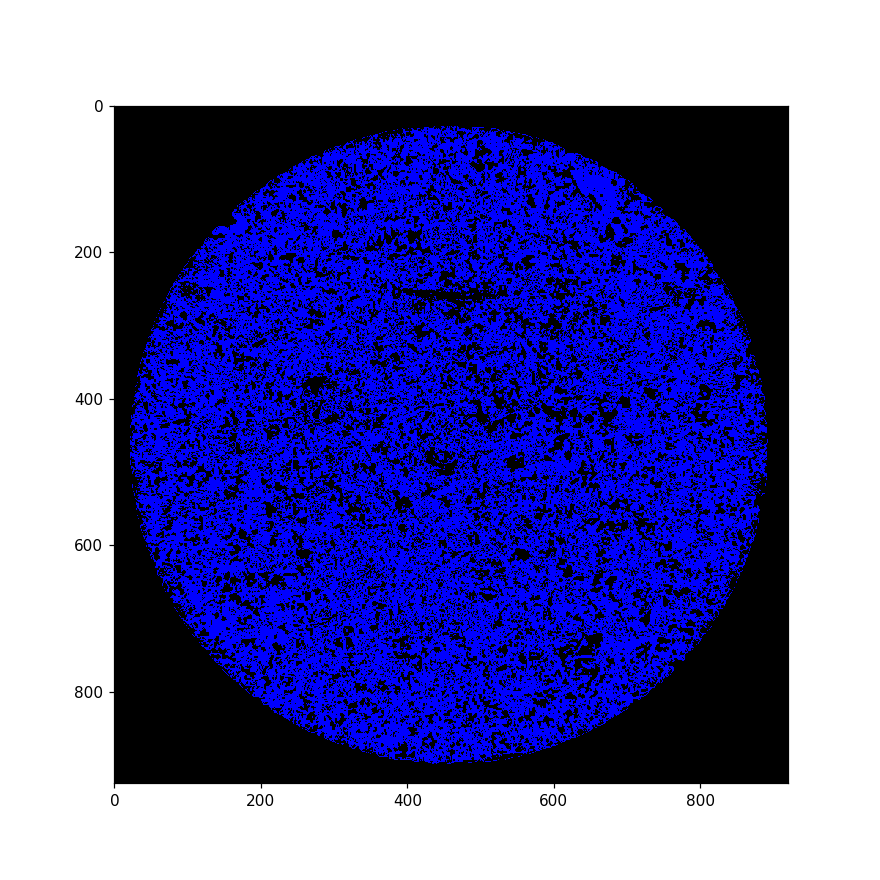

In [294]:
media_img = pinta_imagem(media_cor, media)
show_image(media_img)

<IPython.core.display.Javascript object>


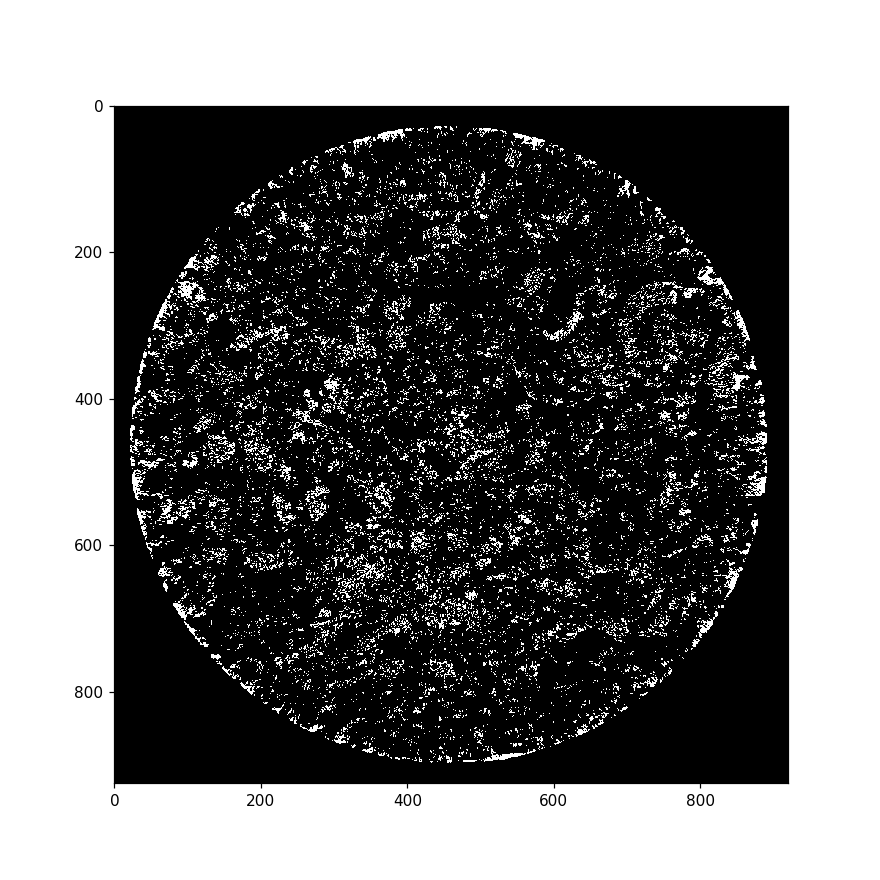

In [295]:
baixa_img = pinta_imagem(baixa_cor, baixa)
show_image(baixa_img)

<IPython.core.display.Javascript object>


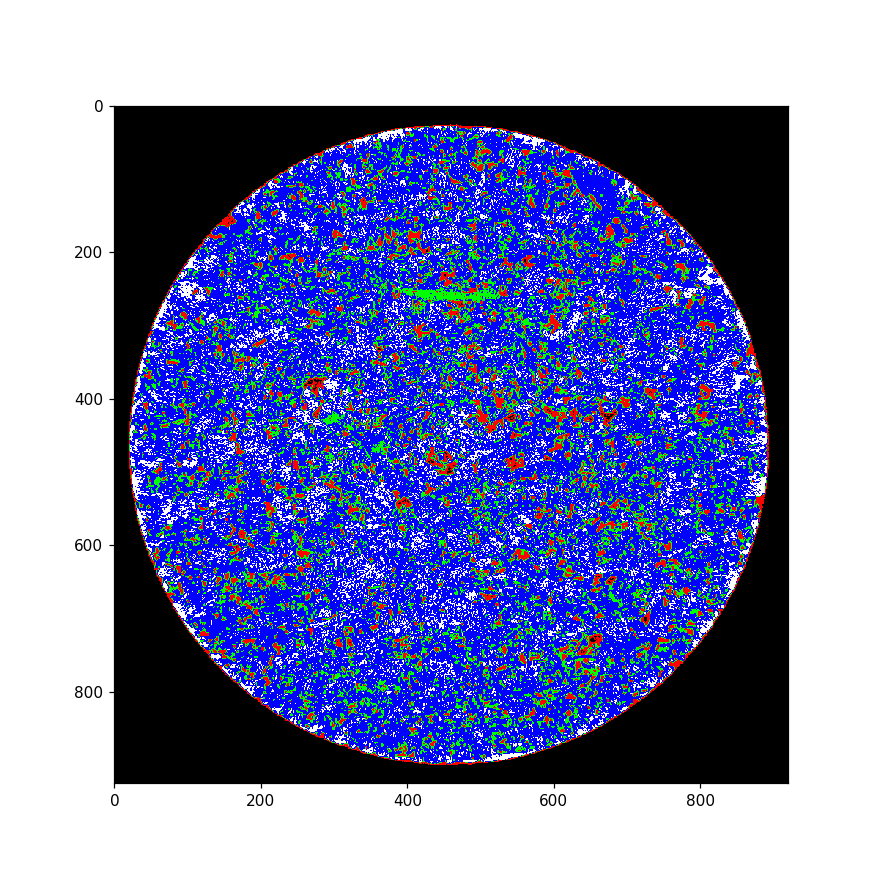

In [296]:
show_image(vazio_img + alta_img + media_img + baixa_img)
# vermelho -> vazio
# verde -> alta porosidade
# azul -> média porosidade
# branco -> baixa porosidade